**Importing the numpy, keras libraries for mathematical computational and building convolutional neural network respectively**

**Importing MNIST dataset**

**Importing Image data generator library for image augmentation - image normalization**

In [1]:
from keras.datasets import mnist
from keras.utils    import to_categorical
from keras.models   import Sequential
from keras.layers   import Convolution2D
from keras.layers   import MaxPooling2D
from keras.layers   import Dense
from keras.layers   import Flatten
from keras.layers   import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# loading MNIST dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshaping the dataset and converting the RGB image into single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# one hot encode target value, i.e., creating a new binary values for each unique integer
trainY = to_categorical(trainY)
testY = to_categorical(testY)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# create generator, setting input mean to 0 over the dataset, feature-wise and also normalizing the image featurewise
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(trainX)
datagen.fit(testX)
# creating train and test set by scaling the images
train_iterator = datagen.flow(trainX, trainY, batch_size=128)
test_iterator = datagen.flow(testX, testY, batch_size=128)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batches train=469, test=79
Batch shape=(128, 28, 28, 1), min=-0.427, max=2.794


#**CNN**

**The following network is the one in assignment 4, except that i have added dropout of 0.1 after each convolution layer.**

In [4]:
from keras.layers import Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Convolution2D(10, 3, 3,input_shape=(width, height, channels)))  # I/P= 28X28X1   | (3X3X1)X10   | O/P 26X26X10 | RF=3X3
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3))                                        # I/P= 26X26X10  | (3X3X10)X20  | O/P 24X24X20 | RF=5X5
model.add(BatchNormalization())
model.add(Activation("relu"))         
model.add(MaxPooling2D(pool_size=(2, 2)))                                 # I/P= 24X24X20  | MP (2X2)     | O/P 12X12X20 | RF=10X10
model.add(Dropout(0.1))
model.add(Convolution2D(20,3,3))                                          # I/P= 12X12X20  | (3X3X20)X20  | O/P 10X10X20 | RF=12X12
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))                                 # I/P= 10X10X20  | MP (2X2)     | O/P 5X5X20   | RF=24X24
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3))                                        # I/P= 5X5X20    | (3X3X20)X20  | O/P 3X3X20   | RF=26X26
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, 1))                                        # I/P= 3X3X20    | (1X1X20)X10  | O/P 3X3X10   | RF=26X26
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Convolution2D(10, 3, 3))                                        # I/P= 3X3X10    |  (3X3X10)X10 | O/P 1X1X10   | RF=28X28
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 20)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


# **mounting the googledrive on runtime using authorization code**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Creating model checkpints so that only the best model is saved.**

In [0]:
filepath="/content/gdrive/My Drive/weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# **Creating functions for L2 regularization and creating a learning rate scheduler**

In [13]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import keras.backend as K
import numpy as np
lmbda=0.01
# L2 Regularization
def reg_term(lmbda):
  w2=0
  for i in range(len(model.layers)):
    if len(model.layers[i].get_weights())>0:
      t=np.sum(model.layers[i].get_weights()[0]*model.layers[i].get_weights()[0])
      w2=w2*t
  w2=w2*(lmbda/(2*trainX.shape[0]))
  return w2
def l2_loss(y_true, y_pred):
  return K.categorical_crossentropy(y_true, y_pred)+reg_term(lmbda)
# Learning rate scheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
#fitting model and compiling the model
model.compile(optimizer=Adam(lr=0.003), loss=l2_loss, metrics=['accuracy'])
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, verbose=1, validation_data=(test_iterator), callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 14s 30ms/step - loss: 0.3008 - acc: 0.9122 - val_loss: 0.0585 - val_acc: 0.9814

Epoch 00001: val_acc improved from -inf to 0.98140, saving model to /content/gdrive/My Drive/weights_best.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 10s 22ms/step - loss: 0.0871 - acc: 0.9730 - val_loss: 0.0503 - val_acc: 0.9840

Epoch 00002: val_acc improved from 0.98140 to 0.98400, saving model to /content/gdrive/My Drive/weights_best.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 10s 22ms/step - loss: 0.0683 - acc: 0.9777 - val_loss: 0.0420 - val_acc: 0.9871

Epoch 00003: val_acc improved from 0.98400 to 0.98710, sav

# **Loading the model with highest validation accuracy**

In [14]:
from keras.layers import Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Convolution2D(10, 3, 3,input_shape=(width, height, channels)))  # I/P= 28X28X1   | (3X3X1)X10   | O/P 26X26X10 | RF=3X3
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3))                                        # I/P= 26X26X10  | (3X3X10)X20  | O/P 24X24X20 | RF=5X5
model.add(BatchNormalization())
model.add(Activation("relu"))         
model.add(MaxPooling2D(pool_size=(2, 2)))                                 # I/P= 24X264X20 | MP (2X2)     | O/P 12X12X20 | RF=10X10
model.add(Dropout(0.1))
model.add(Convolution2D(20,3,3))                                          # I/P= 12X12X20  | (3X3X20)X20  | O/P 10X10X20 | RF=12X12
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))                                 # I/P= 10X10X20  | MP (2X2)     | O/P 5X5X20   | RF=24X24
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3))                                        # I/P= 5X5X20   | (3X3X20)X20  | O/P 3X3X20   | RF=26X26
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, 1))                                        # I/P= 3X3X20    | (1X1X20)X10  | O/P 3X3X10   | RF=26X26
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Convolution2D(10, 3, 3))                                        # I/P= 3X3X10    |  (3X3X10)X10 | O/P 1X1X10   | RF=28X28
model.add(Flatten())
model.add(Activation('softmax'))
model.load_weights('/content/gdrive/My Drive/weights_best.hdf5')
model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


Test Accuracy: 99.460


# **Creating an image gallery of misclassified images. Printing only the first 25 images**

Image: 1 Predicted: 2 Actual: 1


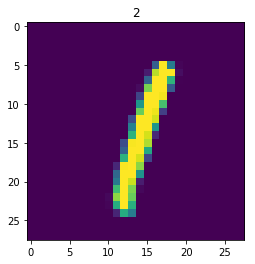

Image: 2 Predicted: 8 Actual: 1


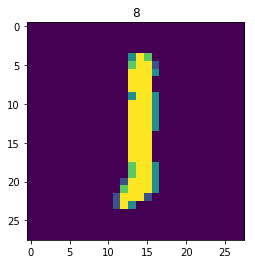

Image: 3 Predicted: 8 Actual: 1


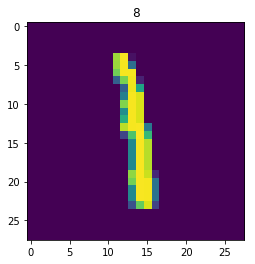

Image: 4 Predicted: 8 Actual: 1


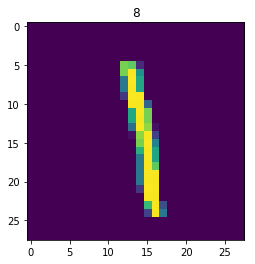

Image: 5 Predicted: 8 Actual: 1


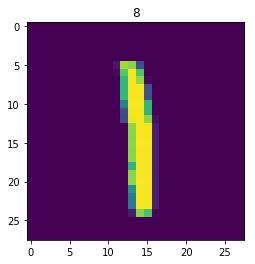

Image: 6 Predicted: 8 Actual: 1


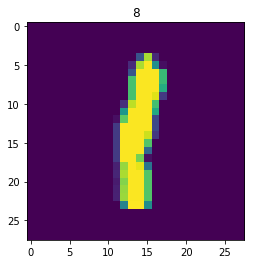

Image: 7 Predicted: 8 Actual: 1


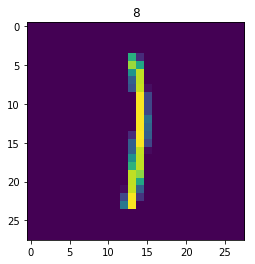

Image: 8 Predicted: 8 Actual: 1


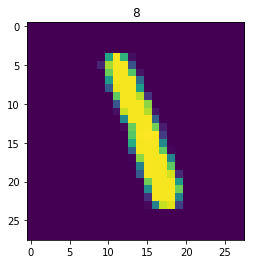

Image: 9 Predicted: 2 Actual: 1


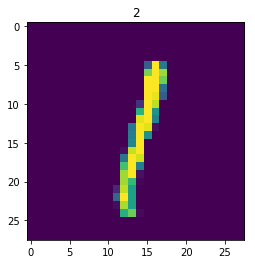

Image: 10 Predicted: 8 Actual: 9


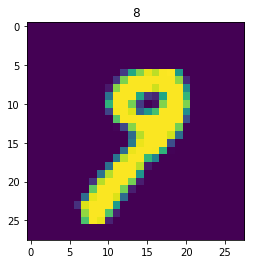

Image: 11 Predicted: 2 Actual: 1


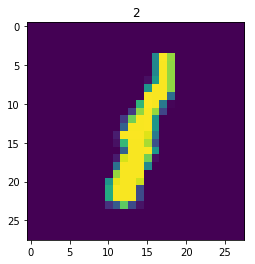

Image: 12 Predicted: 8 Actual: 1


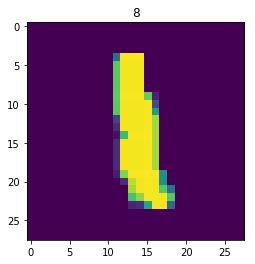

Image: 13 Predicted: 8 Actual: 4


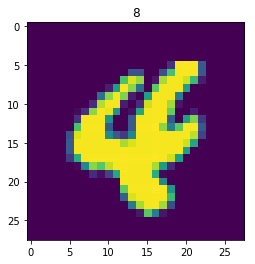

Image: 14 Predicted: 8 Actual: 1


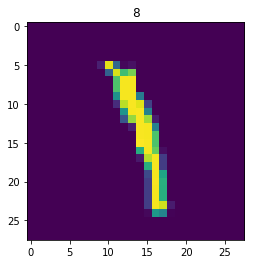

Image: 15 Predicted: 2 Actual: 1


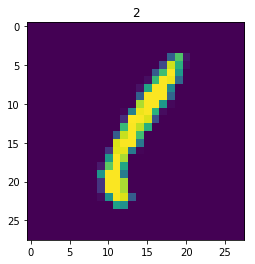

Image: 16 Predicted: 2 Actual: 7


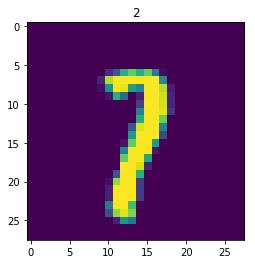

Image: 17 Predicted: 2 Actual: 1


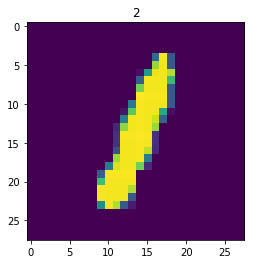

Image: 18 Predicted: 8 Actual: 1


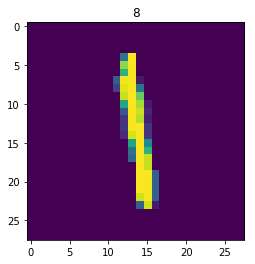

Image: 19 Predicted: 8 Actual: 1


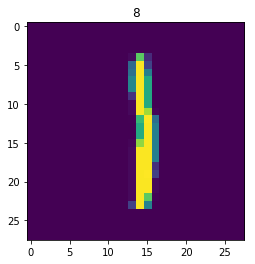

Image: 20 Predicted: 8 Actual: 1


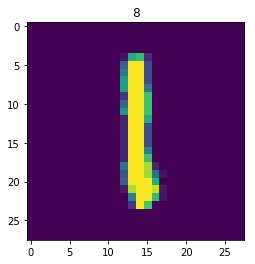

Image: 21 Predicted: 2 Actual: 7


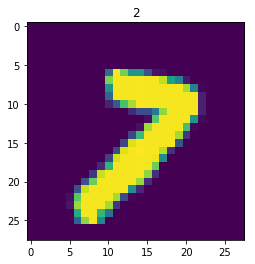

Image: 22 Predicted: 2 Actual: 7


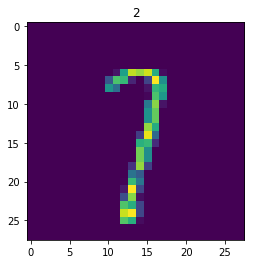

Image: 23 Predicted: 8 Actual: 1


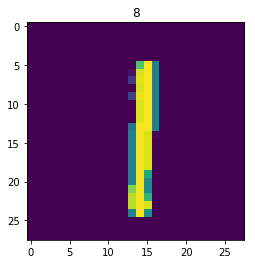

Image: 24 Predicted: 8 Actual: 1


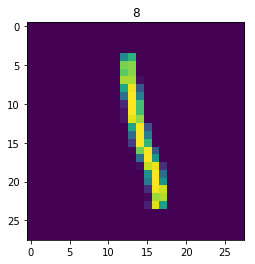

Image: 25 Predicted: 2 Actual: 1


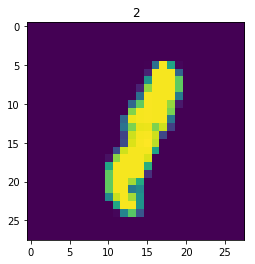

In [16]:
import matplotlib.pyplot as plt
(trainX, trainY), (testX, testY) = mnist.load_data()
count=0
for i in range(0,10000):
  img=testX[i]
  test_img = img.reshape(1, width, height, channels)
  img_class = model.predict_classes(test_img)
  prediction = img_class[0]
  classname = img_class[0]
  if classname != testY[i]:
    print("Image:", count+1,"Predicted:", classname, "Actual:", testY[i])
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.title(classname)
    plt.show()
    count=count+1
    if count==25:
      break